In [1]:
import sys
import polars as pl
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
file_path = sys.path[0]+"/mudah-apartment-kl-selangor.csv"

In [3]:
df = pl.read_csv(file_path, infer_schema_length=10000) 

In [4]:
df

ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
i64,str,f64,str,str,str,str,f64,f64,str,str,str,str,str
100323185,"""The Hipster @ …",2022.0,"""RM 4 200 per m…","""Kuala Lumpur -…","""Condominium""","""5""",2.0,6.0,"""1842 sq.ft.""","""Fully Furnishe…","""Minimart, Gymn…","""Air-Cond, Cook…","""Kuala Lumpur"""
100203973,"""Segar Courts""",null,"""RM 2 300 per m…","""Kuala Lumpur -…","""Condominium""","""3""",1.0,2.0,"""1170 sq.ft.""","""Partially Furn…","""Playground, Pa…","""Air-Cond, Cook…","""Kuala Lumpur"""
100323128,"""Pangsapuri Ter…",null,"""RM 1 000 per m…","""Kuala Lumpur -…","""Apartment""","""3""",null,2.0,"""650 sq.ft.""","""Fully Furnishe…","""Minimart, Jogg…",null,"""Kuala Lumpur"""
100191767,"""Sentul Point S…",2020.0,"""RM 1 700 per m…","""Kuala Lumpur -…","""Apartment""","""2""",1.0,2.0,"""743 sq.ft.""","""Partially Furn…","""Parking, Playg…","""Cooking Allowe…","""Kuala Lumpur"""
97022692,"""Arte Mont Kiar…",null,"""RM 1 299 per m…","""Kuala Lumpur -…","""Service Reside…","""1""",1.0,1.0,"""494 sq.ft.""","""Not Furnished""","""Parking, Secur…","""Air-Cond""","""Kuala Lumpur"""
100322897,"""Residensi Vist…",null,"""RM 1 500 per m…","""Kuala Lumpur -…","""Apartment""","""3""",1.0,2.0,"""884 sq.ft.""","""Partially Furn…","""Parking, Secur…","""Cooking Allowe…","""Kuala Lumpur"""
100322962,"""Sky Meridien""",null,"""RM 2 900 per m…","""Kuala Lumpur -…","""Service Reside…","""3""",2.0,2.0,"""982 sq.ft.""","""Fully Furnishe…","""Parking, Secur…","""Air-Cond, Cook…","""Kuala Lumpur"""
100322885,"""Arte Plus Jala…",2018.0,"""RM 1 550 per m…","""Kuala Lumpur -…","""Service Reside…","""1""",1.0,1.0,"""700 sq.ft.""","""Fully Furnishe…","""Parking, Gymna…","""Air-Cond, Cook…","""Kuala Lumpur"""
100322866,"""Nova I""",2014.0,"""RM 1 400 per m…","""Kuala Lumpur -…","""Apartment""","""2""",1.0,1.0,"""750 sq.ft.""","""Fully Furnishe…","""Playground, Se…","""Air-Cond, Cook…","""Kuala Lumpur"""


In [5]:
df.describe()

describe,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
str,f64,str,f64,str,str,str,str,f64,f64,str,str,str,str,str
"""count""",19991.0,"""19043""",10806.0,"""19989""","""19991""","""19991""","""19985""",14289.0,19985.0,"""19991""","""19986""","""17782""","""14043""","""19991"""
"""null_count""",0.0,"""948""",9185.0,"""2""","""0""","""0""","""6""",5702.0,6.0,"""0""","""5""","""2209""","""5948""","""0"""
"""mean""",9.9707e7,null,2014.822321,null,null,null,null,1.416824,1.891719,null,null,null,null,null
"""std""",3.4826e6,null,6.735355,null,null,null,null,0.567368,0.556266,null,null,null,null,null
"""min""",1.6525511e7,"""1 Harmonis""",1977.0,"""RM 1 000 per m…","""Kuala Lumpur -…","""Apartment""","""1""",1.0,1.0,"""1 sq.ft.""","""Fully Furnishe…","""Barbeque area""",""", Air-Cond, Co…","""Kuala Lumpur"""
"""25%""",9.9840131e7,null,2012.0,null,null,null,null,1.0,2.0,null,null,null,null,null
"""50%""",1.00212678e8,null,2017.0,null,null,null,null,1.0,2.0,null,null,null,null,null
"""75%""",1.00617887e8,null,2020.0,null,null,null,null,2.0,2.0,null,null,null,null,null
"""max""",1.00854617e8,"""wangsa maju se…",2025.0,"""RM 999 per mon…","""Selangor - Ulu…","""Townhouse Cond…","""More than 10""",10.0,8.0,"""99999999 sq.ft…","""Partially Furn…","""Tennis Court, …","""Washing Machin…","""Selangor"""


In [6]:
df = df.filter(pl.col("region") == "Kuala Lumpur")

In [7]:
df.filter(df.is_duplicated())

ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
i64,str,f64,str,str,str,str,f64,f64,str,str,str,str,str


In [8]:
df = df.unique()

In [9]:
df = df.with_columns(pl.col("monthly_rent").apply(lambda x: int(re.search(r'RM (.*?) per', x).group(1).replace(' ', ''))))
df = df.rename({"monthly_rent": "monthly_rent_rm"})

/var/folders/_2/z795zyvj3b9g_b_xsm7nmz3h0000gn/T/ipykernel_52706/3724543665.py:1: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  df = df.with_columns(pl.col("monthly_rent").apply(lambda x: int(re.search(r'RM (.*?) per', x).group(1).replace(' ', ''))))


In [10]:
df = df.with_columns(pl.col("size").apply(lambda x: int(re.search(r'(.*?) sq', x).group(1).replace(' ', ''))))
df = df.rename({'size': 'size_sqft'})

/var/folders/_2/z795zyvj3b9g_b_xsm7nmz3h0000gn/T/ipykernel_52706/4143207969.py:1: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  df = df.with_columns(pl.col("size").apply(lambda x: int(re.search(r'(.*?) sq', x).group(1).replace(' ', ''))))


In [11]:
df = df.with_columns(pl.col("location").apply(lambda x: re.sub(r"Kuala Lumpur - \s*", "", x)))

/var/folders/_2/z795zyvj3b9g_b_xsm7nmz3h0000gn/T/ipykernel_52706/750231160.py:1: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  df = df.with_columns(pl.col("location").apply(lambda x: re.sub(r"Kuala Lumpur - \s*", "", x)))


In [12]:
df

ads_id,prop_name,completion_year,monthly_rent_rm,location,property_type,rooms,parking,bathroom,size_sqft,furnished,facilities,additional_facilities,region
i64,str,f64,i64,str,str,str,f64,f64,i64,str,str,str,str
100239196,"""Greenview Apar…",null,1000,"""Kepong""","""Apartment""","""5""",null,2.0,855,"""Partially Furn…","""Security, Park…","""Cooking Allowe…","""Kuala Lumpur"""
100231953,"""East Side One …",null,1800,"""Ampang""","""Condominium""","""3""",1.0,2.0,1100,"""Fully Furnishe…","""Gymnasium, Min…",null,"""Kuala Lumpur"""
93075352,"""G Residence @ …",2015.0,4500,"""Desa Pandan""","""Service Reside…","""3""",2.0,2.0,1539,"""Fully Furnishe…","""Multipurpose h…","""Air-Cond, Cook…","""Kuala Lumpur"""
100322029,"""Majestic Maxim…",2021.0,1800,"""Cheras""","""Service Reside…","""3""",1.0,2.0,819,"""Partially Furn…","""Security, Swim…","""Air-Cond, Cook…","""Kuala Lumpur"""
100322005,"""Baiduri Apartm…",null,1500,"""Desa Pandan""","""Apartment""","""3""",1.0,2.0,950,"""Partially Furn…","""Security, Park…",null,"""Kuala Lumpur"""
99492392,"""3 Towers""",2015.0,2500,"""Ampang Hilir""","""Condominium""","""2""",1.0,1.0,890,"""Fully Furnishe…","""Security, Gymn…",null,"""Kuala Lumpur"""
99528357,"""Casa Mutiara""",2007.0,2000,"""Bukit Bintang""","""Service Reside…","""2""",1.0,2.0,742,"""Fully Furnishe…","""Gymnasium, Sau…",null,"""Kuala Lumpur"""
100235642,"""Midah Ria""",null,1300,"""Cheras""","""Condominium""","""3""",1.0,2.0,967,"""Partially Furn…","""Parking, Secur…","""Air-Cond, Cook…","""Kuala Lumpur"""
99364321,"""The Capers""",null,2100,"""Sentul""","""Service Reside…","""2""",null,2.0,999,"""Partially Furn…","""Playground, Pa…","""Air-Cond, Cook…","""Kuala Lumpur"""


In [13]:
def extract_near_ktm_lrt(text):
    pattern = re.compile(r'\bNear KTM/LRT\b')
    try:
        match = pattern.search(text)
        if match:
            return 'yes'
        return 'no'
    except TypeError:
        return text

In [14]:
df["additional_facilities"].apply(lambda x: extract_near_ktm_lrt(x))

/var/folders/_2/z795zyvj3b9g_b_xsm7nmz3h0000gn/T/ipykernel_52706/2470620563.py:1: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  df["additional_facilities"].apply(lambda x: extract_near_ktm_lrt(x))


additional_facilities
str
"""yes"""
null
"""yes"""
"""yes"""
null
null
null
"""yes"""
"""yes"""


In [15]:
df = df.select([
    pl.all(),
    pl.col("additional_facilities").apply(lambda x: extract_near_ktm_lrt(x)).alias("nearby_railways")
])

/var/folders/_2/z795zyvj3b9g_b_xsm7nmz3h0000gn/T/ipykernel_52706/2460890770.py:3: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  pl.col("additional_facilities").apply(lambda x: extract_near_ktm_lrt(x)).alias("nearby_railways")


In [16]:
near_ktmlrt = df.filter(pl.col("nearby_railways") == "yes").select(pl.col("monthly_rent_rm")).median().item()
not_near_ktmlrt = df.filter(pl.col("nearby_railways") == "no").select(pl.col("monthly_rent_rm")).median().item()

In [17]:
f""" 
Median:
Nearby KTM/LRT: {near_ktmlrt:.0f}RM
Not nearby KTM/LRT: {not_near_ktmlrt:.0f}RM
"""

' \nMedian:\nNearby KTM/LRT: 1650RM\nNot nearby KTM/LRT: 1600RM\n'

/Users/bezeeta444/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


(0.0, 4000.0)

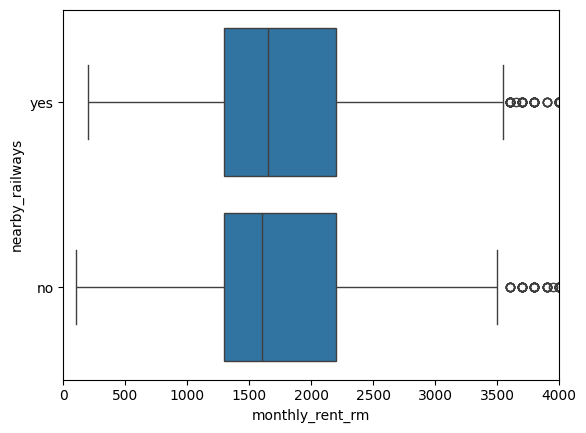

In [18]:
sns.boxplot(data=df.to_pandas(), x='monthly_rent_rm', y='nearby_railways')
plt.xlim(0,4000)

In [19]:
df.select(pl.all().is_null()).sum()

ads_id,prop_name,completion_year,monthly_rent_rm,location,property_type,rooms,parking,bathroom,size_sqft,furnished,facilities,additional_facilities,region,nearby_railways
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,508,4373,0,0,0,2,2630,2,0,1,895,2831,0,2831


In [20]:
df

ads_id,prop_name,completion_year,monthly_rent_rm,location,property_type,rooms,parking,bathroom,size_sqft,furnished,facilities,additional_facilities,region,nearby_railways
i64,str,f64,i64,str,str,str,f64,f64,i64,str,str,str,str,str
100239196,"""Greenview Apar…",null,1000,"""Kepong""","""Apartment""","""5""",null,2.0,855,"""Partially Furn…","""Security, Park…","""Cooking Allowe…","""Kuala Lumpur""","""yes"""
100231953,"""East Side One …",null,1800,"""Ampang""","""Condominium""","""3""",1.0,2.0,1100,"""Fully Furnishe…","""Gymnasium, Min…",null,"""Kuala Lumpur""",null
93075352,"""G Residence @ …",2015.0,4500,"""Desa Pandan""","""Service Reside…","""3""",2.0,2.0,1539,"""Fully Furnishe…","""Multipurpose h…","""Air-Cond, Cook…","""Kuala Lumpur""","""yes"""
100322029,"""Majestic Maxim…",2021.0,1800,"""Cheras""","""Service Reside…","""3""",1.0,2.0,819,"""Partially Furn…","""Security, Swim…","""Air-Cond, Cook…","""Kuala Lumpur""","""yes"""
100322005,"""Baiduri Apartm…",null,1500,"""Desa Pandan""","""Apartment""","""3""",1.0,2.0,950,"""Partially Furn…","""Security, Park…",null,"""Kuala Lumpur""",null
99492392,"""3 Towers""",2015.0,2500,"""Ampang Hilir""","""Condominium""","""2""",1.0,1.0,890,"""Fully Furnishe…","""Security, Gymn…",null,"""Kuala Lumpur""",null
99528357,"""Casa Mutiara""",2007.0,2000,"""Bukit Bintang""","""Service Reside…","""2""",1.0,2.0,742,"""Fully Furnishe…","""Gymnasium, Sau…",null,"""Kuala Lumpur""",null
100235642,"""Midah Ria""",null,1300,"""Cheras""","""Condominium""","""3""",1.0,2.0,967,"""Partially Furn…","""Parking, Secur…","""Air-Cond, Cook…","""Kuala Lumpur""","""yes"""
99364321,"""The Capers""",null,2100,"""Sentul""","""Service Reside…","""2""",null,2.0,999,"""Partially Furn…","""Playground, Pa…","""Air-Cond, Cook…","""Kuala Lumpur""","""yes"""


In [21]:
df = df.drop(['ads_id', 
    'prop_name', 
    'facilities', 
    'additional_facilities'])

In [22]:
df.select(pl.col("rooms")).unique()

rooms
str
"""9"""
"""More than 10"""
"""7"""
"""4"""
"""2"""
"""6"""
"""3"""
null
"""5"""


In [23]:
df = df.with_columns(pl.col("rooms").apply(lambda x: 10 if x == "More than 10" else x))

/var/folders/_2/z795zyvj3b9g_b_xsm7nmz3h0000gn/T/ipykernel_52706/381863451.py:1: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  df = df.with_columns(pl.col("rooms").apply(lambda x: 10 if x == "More than 10" else x))


In [24]:
df = df.with_columns(pl.col("rooms").cast(pl.Float64))

In [25]:
df = df.with_columns(pl.col("rooms").cast(pl.Int64))

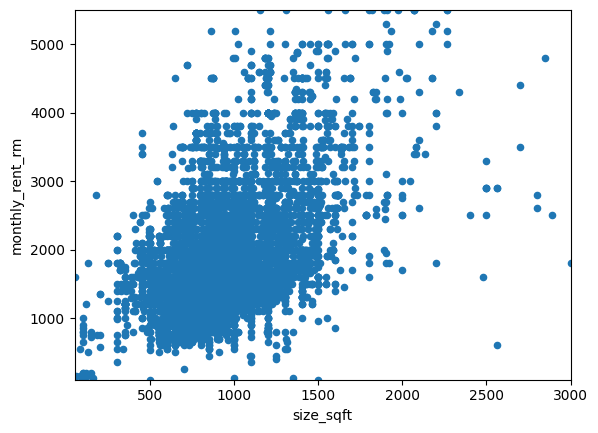

In [26]:
df.to_pandas()[['size_sqft', 'monthly_rent_rm']].plot(kind='scatter', x='size_sqft', y='monthly_rent_rm');
plt.ylim(100,5500)
plt.xlim(50,3000)
plt.show()

<Axes: title={'center': 'all data'}>

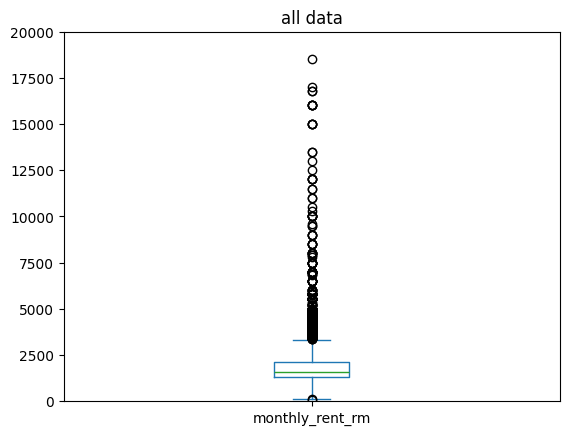

In [27]:
df.to_pandas()["monthly_rent_rm"].plot(kind="box", ylim = (0,20000), title='all data')

<Axes: title={'center': 'croped at 5,000 RM'}>

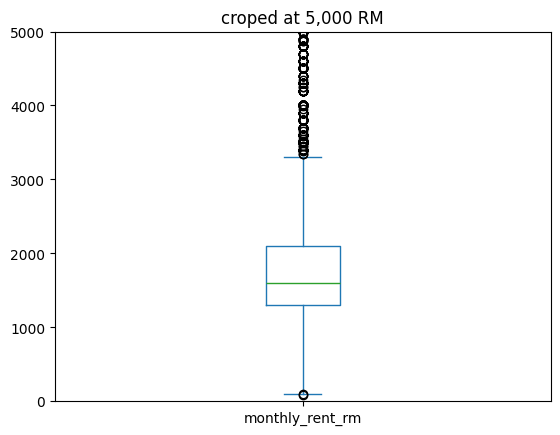

In [28]:
df.to_pandas()["monthly_rent_rm"].plot(kind="box", ylim = (0,5000), title='croped at 5,000 RM')

In [29]:
df.columns

['completion_year',
 'monthly_rent_rm',
 'location',
 'property_type',
 'rooms',
 'parking',
 'bathroom',
 'size_sqft',
 'furnished',
 'region',
 'nearby_railways']

In [30]:
dfx = df.filter((pl.col("monthly_rent_rm") > 100) & (pl.col("monthly_rent_rm") < 5500))

In [31]:
dfx.describe()

describe,completion_year,monthly_rent_rm,location,property_type,rooms,parking,bathroom,size_sqft,furnished,region,nearby_railways
str,f64,f64,str,str,f64,f64,f64,f64,str,str,str
"""count""",5530.0,9841.0,"""9841""","""9841""",9838.0,7245.0,9840.0,9841.0,"""9841""","""9841""","""7063"""
"""null_count""",4311.0,0.0,"""0""","""0""",3.0,2596.0,1.0,0.0,"""0""","""0""","""2778"""
"""mean""",2014.86311,1786.84026,null,null,2.742427,1.339268,1.92876,11112.787522,null,null,null
"""std""",7.436904,768.813626,null,null,0.7637,0.517512,0.517118,1.0080e6,null,null,null
"""min""",1980.0,110.0,"""Ampang""","""Apartment""",1.0,1.0,1.0,1.0,"""Fully Furnishe…","""Kuala Lumpur""","""no"""
"""25%""",2011.0,1300.0,null,null,2.0,1.0,2.0,800.0,null,null,null
"""50%""",2017.0,1600.0,null,null,3.0,1.0,2.0,908.0,null,null,null
"""75%""",2020.0,2100.0,null,null,3.0,2.0,2.0,1087.0,null,null,null
"""max""",2025.0,5300.0,"""Wangsa Maju""","""Townhouse Cond…",9.0,10.0,6.0,9.9999999e7,"""Partially Furn…","""Kuala Lumpur""","""yes"""


<Axes: >

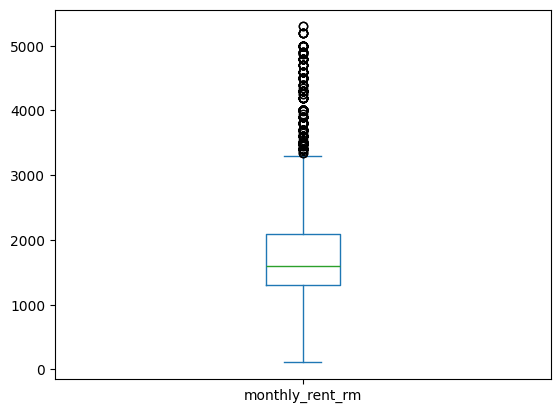

In [32]:
dfx.to_pandas().monthly_rent_rm.plot(kind='box', x='monthly_rent_rm')

<Axes: title={'center': 'all data'}>

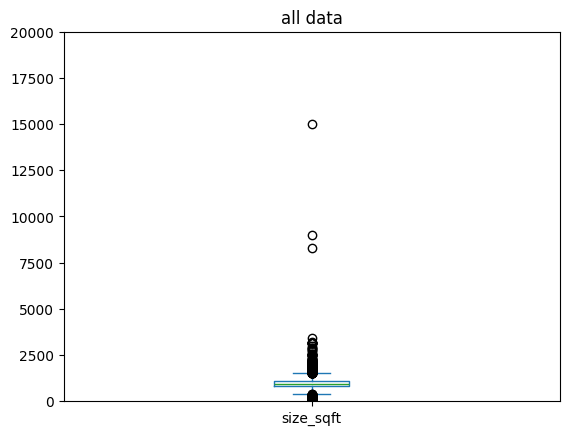

In [33]:
dfx.to_pandas()["size_sqft"].plot(kind="box", ylim = (0,20000), title='all data')

<Axes: title={'center': 'croped at 2,000 RM'}>

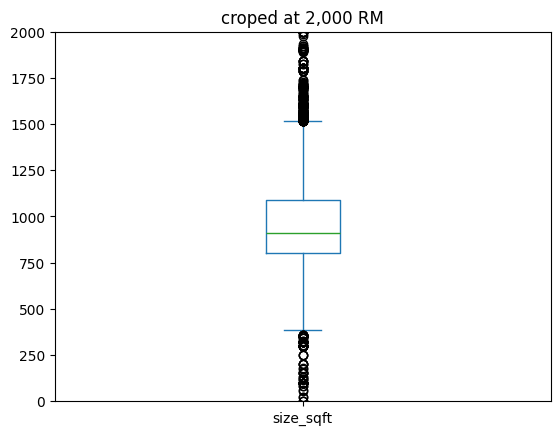

In [34]:
dfx.to_pandas()["size_sqft"].plot(kind="box", ylim = (0,2000), title='croped at 2,000 RM')

In [35]:
dfx = dfx.filter((pl.col("size_sqft") > 50) & (pl.col("size_sqft") < 3000))

<Axes: >

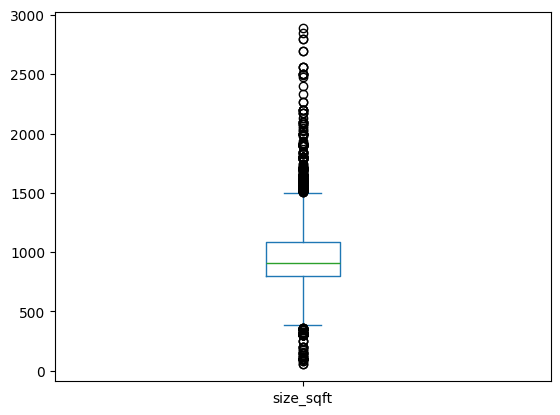

In [36]:
dfx.to_pandas()["size_sqft"].plot(kind='box')

In [37]:
dfx.drop("monthly_rent_rm").to_pandas()

,completion_year,location,property_type,rooms,parking,bathroom,size_sqft,furnished,region,nearby_railways
0,NaN,Kepong,Apartment,5.0,NaN,2.0,855,Partially Furnished,Kuala Lumpur,yes
1,NaN,Ampang,Condominium,3.0,1.0,2.0,1100,Fully Furnished,Kuala Lumpur,None
2,2015.0,Desa Pandan,Service Residence,3.0,2.0,2.0,1539,Fully Furnished,Kuala Lumpur,yes
3,2021.0,Cheras,Service Residence,3.0,1.0,2.0,819,Partially Furnished,Kuala Lumpur,yes
4,NaN,Desa Pandan,Apartment,3.0,1.0,2.0,950,Partially Furnished,Kuala Lumpur,None
...,...,...,...,...,...,...,...,...,...,...
9817,2021.0,Kepong,Apartment,2.0,2.0,2.0,872,Fully Furnished,Kuala Lumpur,yes
9818,NaN,KL Sentral,Service Residence,4.0,1.0,2.0,182,Partially Furnished,Kuala Lumpur,yes
9819,1998.0,Taman Desa,Apartment,3.0,NaN,2.0,657,Fully Furnished,Kuala Lumpur,no
9820,2021.0,Cheras,Condominium,3.0,2.0,2.0,1000,Partially Furnished,Kuala Lumpur,yes


In [38]:
dfx.select(pl.col("monthly_rent_rm")).to_numpy()

array([[1000],
       [1800],
       [4500],
       ...,
       [1000],
       [1488],
       [2000]])

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(dfx.drop("monthly_rent_rm").to_pandas(),
                                                    dfx.select(pl.col("monthly_rent_rm")).to_numpy(),
                                                    test_size = 0.2,
                                                    random_state = 123)

In [41]:
len(X_test)/len(dfx.drop("monthly_rent_rm").to_pandas())

0.20006108735491754

In [42]:
X_train

,completion_year,location,property_type,rooms,parking,bathroom,size_sqft,furnished,region,nearby_railways
5864,NaN,Cheras,Apartment,3.0,1.0,2.0,806,Not Furnished,Kuala Lumpur,yes
2120,2021.0,Kepong,Condominium,1.0,NaN,1.0,866,Fully Furnished,Kuala Lumpur,yes
9546,NaN,Cheras,Condominium,3.0,NaN,2.0,860,Partially Furnished,Kuala Lumpur,no
8409,2007.0,Setapak,Condominium,3.0,1.0,2.0,1100,Fully Furnished,Kuala Lumpur,yes
2764,2022.0,Taman Desa,Condominium,3.0,2.0,2.0,958,Partially Furnished,Kuala Lumpur,yes
...,...,...,...,...,...,...,...,...,...,...
9785,2021.0,Segambut,Service Residence,3.0,NaN,2.0,1055,Fully Furnished,Kuala Lumpur,no
7763,NaN,Cheras,Condominium,3.0,1.0,2.0,900,Fully Furnished,Kuala Lumpur,None
5218,NaN,Old Klang Road,Condominium,2.0,1.0,2.0,840,Fully Furnished,Kuala Lumpur,None
1346,NaN,Cheras,Apartment,3.0,1.0,2.0,775,Not Furnished,Kuala Lumpur,None


In [43]:
print(dfx["location"].n_unique())
print(X_train.location.nunique())
print(X_test.location.nunique())

60
60
54


In [44]:
print(dfx["property_type"].n_unique())
print(X_train.property_type.nunique())
print(X_test.property_type.nunique())

9
9
7


In [45]:
print(set(X_train.furnished.to_list()) - set(X_test.furnished.to_list()))
print(set(X_train.location.to_list()) - set(X_test.location.to_list()))
print(set(X_train.property_type.to_list()) - set(X_test.property_type.to_list()))
print(set(X_train.nearby_railways.to_list()) - set(X_test.nearby_railways.to_list()))

set()
{'Chan Sow Lin', 'Damansara', 'KL Eco City', 'Salak Selatan', 'Sungai Penchala', 'Bukit Tunku'}
{'Condo / Services residence / Penthouse / Townhouse', 'Townhouse Condo'}
set()


In [46]:
dfx["location"].value_counts().sort("counts").head(11)["location"].to_numpy()

ColumnNotFoundError: counts

In [ ]:
dfx["property_type"].value_counts().sort("property_type")

property_type,counts
str,u32
"""Apartment""",2123
"""Condo / Servic…",1
"""Condominium""",4698
"""Duplex""",27
"""Flat""",265
"""Others""",27
"""Service Reside…",2647
"""Studio""",27
"""Townhouse Cond…",7


In [ ]:
dfx_new = dfx.filter(
    (pl.col("location") != 'Chan Sow Lin') & (pl.col("location") != 'Sungai Penchala') &
    (pl.col("location") != 'Damansara') & (pl.col("location") != 'KL Eco City') & 
    (pl.col("location") != 'Bukit Tunku') & (pl.col("location") != 'Others') &
    (pl.col("location") != 'KL Sentral') & (pl.col("location") != 'Salak Selatan') &
    (pl.col("location") != 'Serdang') &  (pl.col("location") != 'Bandar Damai Perdana') &
    (pl.col("location") != 'Jinjang') &
    # (pl.col("property_type != 'Others') &
    (pl.col("property_type") != 'Condo / Services residence / Penthouse / Townhouse') &
    (pl.col("property_type") != 'Townhouse Condo'))

In [ ]:
dfx_new["property_type"].value_counts()

property_type,counts
str,u32
"""Others""",26
"""Apartment""",2112
"""Service Reside…",2633
"""Duplex""",27
"""Condominium""",4680
"""Studio""",26
"""Flat""",259


In [ ]:
dfx_new

completion_year,monthly_rent_rm,location,property_type,rooms,parking,bathroom,size_sqft,furnished,region,nearby_railways
f64,i64,str,str,i64,f64,f64,i64,str,str,str
null,801,"""Sungai Besi""","""Condominium""",3,2.0,3.0,1022,"""Partially Furn…","""Kuala Lumpur""","""yes"""
2013.0,2300,"""Cheras""","""Condominium""",3,2.0,2.0,920,"""Fully Furnishe…","""Kuala Lumpur""",null
1988.0,1300,"""Pantai""","""Condominium""",3,null,2.0,1000,"""Partially Furn…","""Kuala Lumpur""","""yes"""
2013.0,1200,"""Old Klang Road…","""Service Reside…",1,1.0,1.0,350,"""Fully Furnishe…","""Kuala Lumpur""",null
2008.0,1600,"""Setapak""","""Condominium""",4,1.0,4.0,1200,"""Partially Furn…","""Kuala Lumpur""","""yes"""
null,900,"""Cheras""","""Apartment""",3,null,2.0,850,"""Not Furnished""","""Kuala Lumpur""",null
null,1700,"""Kepong""","""Condominium""",3,2.0,2.0,1000,"""Partially Furn…","""Kuala Lumpur""","""no"""
null,1350,"""Pantai""","""Condominium""",2,1.0,2.0,980,"""Partially Furn…","""Kuala Lumpur""","""no"""
2005.0,1500,"""Cheras""","""Condominium""",3,null,2.0,920,"""Fully Furnishe…","""Kuala Lumpur""","""no"""


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfx_new.drop("monthly_rent_rm").to_pandas(),
                                                    dfx_new.select(pl.col("monthly_rent_rm")).to_numpy(),
                                                    test_size = 0.2,
                                                    random_state = 123)

In [ ]:
print(set(X_train.furnished.to_list()) - set(X_test.furnished.to_list()))
print(set(X_train.location.to_list()) - set(X_test.location.to_list()))
print(set(X_train.property_type.to_list()) - set(X_test.property_type.to_list()))

set()
set()
set()


In [ ]:
print(dfx_new["location"].n_unique())
print(X_train.location.nunique())
print(X_test.location.nunique())

49
49
49


In [ ]:
X_train.isna().sum()

completion_year    3423
location              0
property_type         0
rooms                 2
parking            2042
bathroom              0
size_sqft             0
furnished             0
region                0
nearby_railways    2198
dtype: int64

In [ ]:
X_train_num = X_train.select_dtypes(exclude='object')

In [ ]:
from sklearn.impute import SimpleImputer

def numericalImputation(X_train_num, strategy = 'most_frequent'):
    #buat imputer
    imputer_num = SimpleImputer(missing_values = np.nan, strategy = strategy)
    
    #fitting
    imputer_num.fit(X_train_num)

    # transform
    imputed_data = imputer_num.transform(X_train_num)
    X_train_num_imputed = pd.DataFrame(imputed_data)

    #pastikan index dan nama kolom antara imputed dan non-imputed SAMA
    X_train_num_imputed.columns = X_train_num.columns
    X_train_num_imputed.index = X_train_num.index

    return X_train_num_imputed, imputer_num

In [ ]:
def numericalImputationNone(X_train_num, strategy = 'most_frequent'):
    #buat imputer
    imputer_num = SimpleImputer(missing_values = None, strategy = strategy)
    
    #fitting
    imputer_num.fit(X_train_num)

    # transform
    imputed_data = imputer_num.transform(X_train_num)
    X_train_num_imputed = pd.DataFrame(imputed_data)

    #pastikan index dan nama kolom antara imputed dan non-imputed SAMA
    X_train_num_imputed.columns = X_train_num.columns
    X_train_num_imputed.index = X_train_num.index

    return X_train_num_imputed, imputer_num

In [ ]:
X_train_num, imputer_num = numericalImputation(X_train_num, strategy='most_frequent')
X_train_num.isna().sum()

completion_year    0
rooms              0
parking            0
bathroom           0
size_sqft          0
dtype: int64

In [ ]:
X_train_cat = X_train.select_dtypes(include='object')

In [ ]:
X_train_cat

,location,property_type,furnished,region,nearby_railways
7863,Pantai,Condominium,Fully Furnished,Kuala Lumpur,yes
7319,Bandar Menjalara,Condominium,Fully Furnished,Kuala Lumpur,no
1878,Kepong,Apartment,Partially Furnished,Kuala Lumpur,yes
5454,Kepong,Apartment,Partially Furnished,Kuala Lumpur,None
7941,Cheras,Condominium,Fully Furnished,Kuala Lumpur,yes
...,...,...,...,...,...
7382,Wangsa Maju,Condominium,Fully Furnished,Kuala Lumpur,None
7763,Jalan Kuching,Apartment,Fully Furnished,Kuala Lumpur,yes
5218,Sri Petaling,Condominium,Fully Furnished,Kuala Lumpur,no
1346,Keramat,Condominium,Partially Furnished,Kuala Lumpur,None


In [ ]:
X_train_cat.isna().sum()

location              0
property_type         0
furnished             0
region                0
nearby_railways    2198
dtype: int64

In [ ]:
X_train_cat, imputer_num = numericalImputationNone(X_train_cat, strategy='most_frequent')
X_train_cat.isna().sum()

location           0
property_type      0
furnished          0
region             0
nearby_railways    0
dtype: int64

In [ ]:
X_train_cat_ohe =  pd.get_dummies(X_train_cat)

In [ ]:
ohe_columns = X_train_cat_ohe.columns

In [ ]:
X_train_cat_ohe.isna().sum()

location_Ampang                  0
location_Ampang Hilir            0
location_Bandar Menjalara        0
location_Bandar Tasik Selatan    0
location_Bangsar                 0
                                ..
furnished_Not Furnished          0
furnished_Partially Furnished    0
region_Kuala Lumpur              0
nearby_railways_no               0
nearby_railways_yes              0
Length: 62, dtype: int64

In [ ]:
X_train_num.isna().sum()

completion_year    0
rooms              0
parking            0
bathroom           0
size_sqft          0
dtype: int64

In [ ]:
X_train_concat = pd.concat([X_train_num, X_train_cat_ohe], axis = 1)

In [ ]:
X_train_concat

,completion_year,rooms,parking,bathroom,size_sqft,location_Ampang,location_Ampang Hilir,location_Bandar Menjalara,location_Bandar Tasik Selatan,location_Bangsar,...,property_type_Flat,property_type_Others,property_type_Service Residence,property_type_Studio,furnished_Fully Furnished,furnished_Not Furnished,furnished_Partially Furnished,region_Kuala Lumpur,nearby_railways_no,nearby_railways_yes
7863,2019.0,3.0,2.0,3.0,1360.0,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
7319,2021.0,5.0,2.0,3.0,1600.0,False,False,True,False,False,...,False,False,False,False,True,False,False,True,True,False
1878,2020.0,3.0,1.0,2.0,800.0,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,True
5454,2021.0,3.0,1.0,2.0,1300.0,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,True
7941,2021.0,3.0,2.0,2.0,1010.0,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7382,2021.0,3.0,1.0,2.0,850.0,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
7763,2021.0,1.0,1.0,1.0,563.0,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
5218,2021.0,3.0,1.0,2.0,946.0,False,False,False,False,False,...,False,False,False,False,True,False,False,True,True,False
1346,2019.0,3.0,1.0,2.0,1100.0,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,True


In [ ]:
X_train_concat.isnull().sum()

completion_year                  0
rooms                            0
parking                          0
bathroom                         0
size_sqft                        0
                                ..
furnished_Not Furnished          0
furnished_Partially Furnished    0
region_Kuala Lumpur              0
nearby_railways_no               0
nearby_railways_yes              0
Length: 67, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

# Buat fungsi
def standardizerData(data):
    """
    Fungsi untuk melakukan standarisasi data
    :param data: <pandas dataframe> sampel data
    :return standardized_data: <pandas dataframe> sampel data standard
    :return standardizer: method untuk standardisasi data
    """
    data_columns = data.columns  # agar nama kolom tidak hilang
    data_index = data.index  # agar index tidak hilang

    # buat (fit) standardizer
    standardizer = StandardScaler()
    standardizer.fit(data)

    # transform data
    standardized_data_raw = standardizer.transform(data)
    standardized_data = pd.DataFrame(standardized_data_raw)
    standardized_data.columns = data_columns
    standardized_data.index = data_index

    return standardized_data, standardizer

In [ ]:
X_train_clean, standardizer = standardizerData(data = X_train_concat)

In [ ]:
y_baseline = np.ones(len(y_train)) * y_train.mean()
y_baseline

array([1792.25390525, 1792.25390525, 1792.25390525, ..., 1792.25390525,
       1792.25390525, 1792.25390525])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Train the linear regression model
lin_reg = LinearRegression().fit(X_train_clean, y_train)

# Predict using the train data
y_pred_train = y_baseline

# Calculate R-squared
r2_baseline = r2_score(y_train, y_pred_train)

#calculate MAE
mae_baseline = mean_absolute_error(y_train, y_pred_train)

print(f"R2-score: {r2_baseline:.4f} and MAE score: {mae_baseline:.4f}")

R2-score: 0.0000 and MAE score: 563.7968


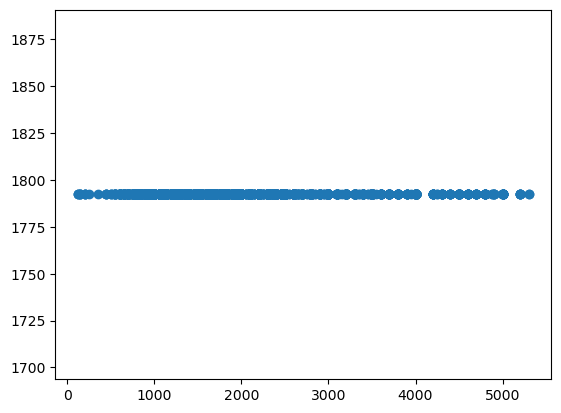

In [ ]:
plt.scatter(x=y_train, y=y_pred_train);

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the linear regression model
lin_reg = LinearRegression().fit(X_train_clean, y_train)

# Predict using the train data
# y_pred = y_baseline
y_pred_train = lin_reg.predict(X_train_clean)

# Calculate mean absolute error
mae_linreg = mean_absolute_error(y_train, y_pred_train)

# Calculate R-squared
r2_linreg = r2_score(y_train, y_pred_train)

print(f"R2-score: {r2_linreg:.4f} and MAE score: {mae_linreg:.4f}")

R2-score: 0.6539 and MAE score: 319.9204


In [ ]:
y_train.flatten()

array([4000, 2500, 1400, ..., 1700, 1500, 1900])

In [ ]:
y_pred_train.shape

(7810, 1)

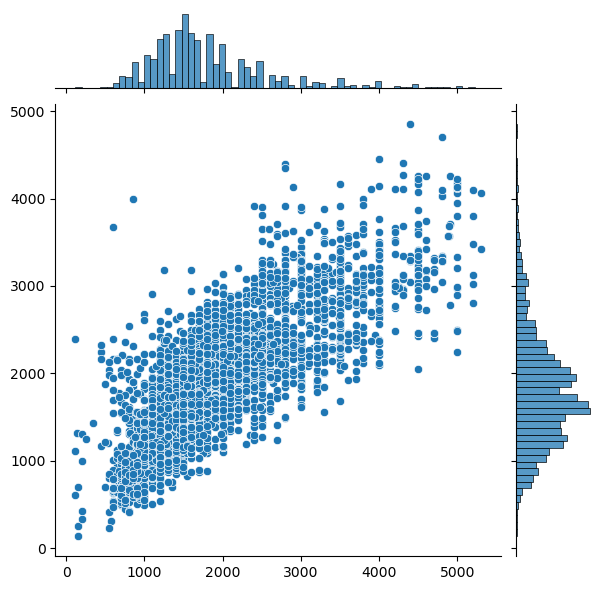

In [ ]:
sns.jointplot(x=y_train.flatten(), y=y_pred_train.flatten());

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Build random forest
grad_tree = GradientBoostingRegressor(random_state = 123)

In [ ]:
# Fit random forest
grad_tree.fit(X_train_clean, y_train)

/home/danialmirxa/miniconda3/envs/UM_Master/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=123)

In [ ]:
# Predict
y_pred_train = grad_tree.predict(X_train_clean)
# y_pred_test = grad_tree.predict(X_test_clean)

# Calculate mean absolute error
mae_gb = mean_absolute_error(y_train, y_pred_train)

# Calculate R-squared
r2_gb = r2_score(y_train, y_pred_train)

print(f"R2-score: {r2_gb:.4f} and MAE score: {mae_gb:.4f}")

R2-score: 0.7281 and MAE score: 281.6673


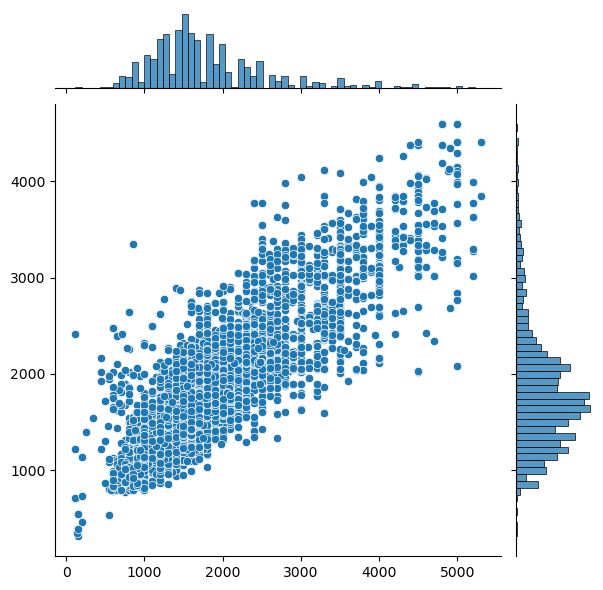

In [ ]:
sns.jointplot(x=y_train.flatten(), y=y_pred_train.flatten());

In [ ]:
#gridsearch

from sklearn.model_selection import GridSearchCV 


params = {'n_estimators': [100, 200, 300, 400, 500],
              'learning_rate': [0.1, 0.05, 0.01]}

# Buat gridsearch
grad_tree = GradientBoostingRegressor(random_state = 123)

grad_tree_cv = GridSearchCV(estimator = grad_tree,
                           param_grid = params,
                           cv = 5,
                           scoring = "neg_mean_absolute_error")

In [ ]:
# Fit grid search cv
grad_tree_cv.fit(X_train_clean, y_train.flatten())

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=123),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_absolute_error')

In [ ]:
grad_tree_cv.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [ ]:
# Refit the Adaboost
grad_tree = GradientBoostingRegressor(n_estimators = grad_tree_cv.best_params_["n_estimators"],
                                      random_state = 123)

grad_tree.fit(X_train_clean, y_train)

/home/danialmirxa/miniconda3/envs/UM_Master/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(n_estimators=500, random_state=123)

In [ ]:
# Predict
y_pred_train = grad_tree.predict(X_train_clean)

# Calculate mean absolute error
mae_gb_cv = mean_absolute_error(y_train, y_pred_train)

# Calculate R-squared
r2_gb_cv = r2_score(y_train, y_pred_train)

print(f"R2-score: {r2_gb_cv:.4f} and MAE score: {mae_gb_cv:.4f}")

R2-score: 0.8194 and MAE score: 228.8047


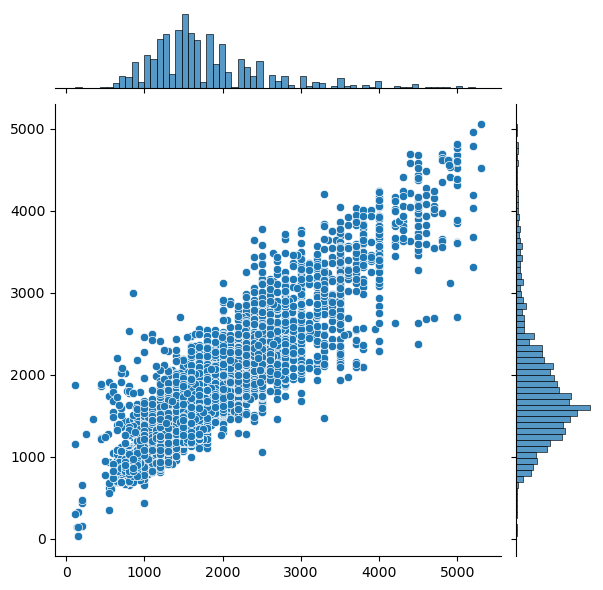

In [ ]:
sns.jointplot(x=y_train.flatten(), y=y_pred_train.flatten())

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Build random forest
rf_tree = RandomForestRegressor(n_estimators = 100,
                                criterion = "squared_error",
                                max_features = "sqrt",
                                random_state = 123)

In [ ]:
# Fit random forest
rf_tree.fit(X_train_clean, y_train)

/tmp/ipykernel_344/863500767.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tree.fit(X_train_clean, y_train)


RandomForestRegressor(max_features='sqrt', random_state=123)

In [ ]:
# Predict
y_pred_train = rf_tree.predict(X_train_clean)

# Calculate mean absolute error
mae_rf = mean_absolute_error(y_train, y_pred_train)

# Calculate R-squared
r2_rf = r2_score(y_train, y_pred_train)

print(f"R2-score: {r2_rf:.4f} and MAE score: {mae_rf:.4f}")

R2-score: 0.9583 and MAE score: 100.9992


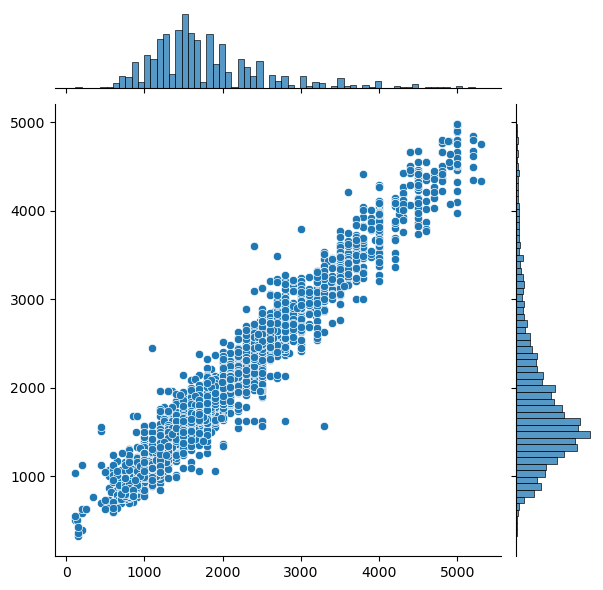

In [ ]:
sns.jointplot(x=y_train.flatten(), y=y_pred_train.flatten())

In [ ]:
params = {"n_estimators": [100, 200, 300, 500 ],
          "max_features": ["sqrt", "log2"]}

# Buat gridsearch
rf_tree = RandomForestRegressor(criterion = "squared_error",
                                random_state = 123)

rf_tree_cv = GridSearchCV(estimator = rf_tree,
                          param_grid = params,
                          cv = 5,
                          scoring = "neg_mean_absolute_error")

In [ ]:
# Fit grid search cv
rf_tree_cv.fit(X_train_clean, y_train.flatten())

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='neg_mean_absolute_error')

In [ ]:
# Best params
rf_tree_cv.best_params_

{'max_features': 'sqrt', 'n_estimators': 300}

In [ ]:
# Refit the Random Forest
rf_tree = RandomForestRegressor(criterion = "squared_error",
                                max_features = rf_tree_cv.best_params_["max_features"],
                                n_estimators = rf_tree_cv.best_params_["n_estimators"],
                                random_state = 123)

rf_tree.fit(X_train_clean, y_train)

/tmp/ipykernel_344/2257456012.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tree.fit(X_train_clean, y_train)


RandomForestRegressor(max_features='sqrt', n_estimators=300, random_state=123)

In [ ]:
# Predict
y_pred_train = rf_tree.predict(X_train_clean)

# Calculate mean absolute error
mae_rf_cv = mean_absolute_error(y_train, y_pred_train)

# # Calculate R-squared
r2_rf_cv = r2_score(y_train, y_pred_train)

print(f"R2-score: {r2_rf_cv:.4f} and MAE score: {mae_rf_cv:.4f}")

R2-score: 0.9596 and MAE score: 99.7348


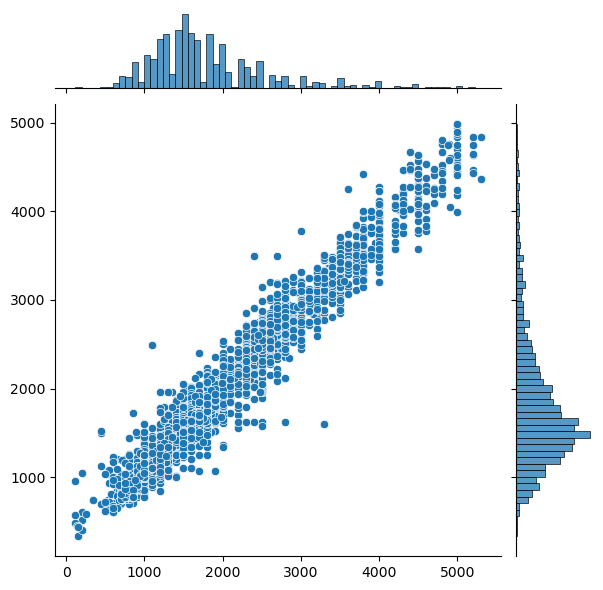

In [ ]:
sns.jointplot(x=y_train.flatten(), y=y_pred_train.flatten())

In [ ]:
mae_score = [mae_baseline, mae_linreg, mae_gb, mae_gb_cv, mae_rf, mae_rf_cv]
r2_score = [r2_baseline, r2_linreg, r2_gb, r2_gb_cv, r2_rf, r2_rf_cv]
indexes = ["baseline", "linear regression", "gradient boosting", "gradient boosting with CV", "random forest",  "random forest with CV"]

summary_df = pd.DataFrame({
    "MAE Train": mae_score,
    "R2-Score": r2_score,
},index = indexes)

summary_df.sort_values(by='R2-Score', ascending=False)

,MAE Train,R2-Score
random forest with CV,99.734764,0.959587
random forest,100.999190,0.958276
gradient boosting with CV,228.804734,0.819383
gradient boosting,281.667306,0.728074
linear regression,319.920354,0.653922
baseline,563.796816,0.000000


/tmp/ipykernel_344/4192798690.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tree.fit(X_train_clean, y_train)


R2-score: 0.960 and MAE score: +/-99.60 RM


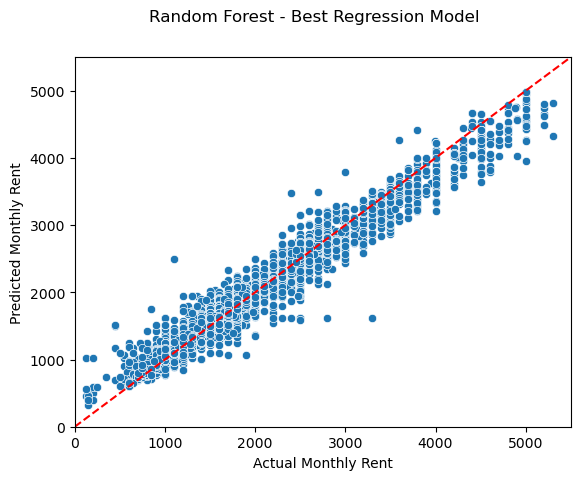

In [ ]:
# libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


#setting up
rf_tree = RandomForestRegressor(n_estimators = 500,
                                criterion = "squared_error",
                                max_features = "sqrt",
                                random_state = 123)

#fit model train
rf_tree.fit(X_train_clean, y_train)

# Predict model train
y_pred_train = rf_tree.predict(X_train_clean)

# Calculate mean absolute error
mae_rf_cv_train = mean_absolute_error(y_train, y_pred_train)

# # Calculate R-squared
r2_rf_cv_train = r2_score(y_train, y_pred_train)

print(f"R2-score: {r2_rf_cv_train:.3f} and MAE score: +/-{mae_rf_cv_train:.2f} RM")

sns.scatterplot(x=y_train.flatten(), y=y_pred_train.flatten() )
plt.plot([0, 5500], [0,5500], "--r")
plt.xlim(0, 5500)
plt.xlabel("Actual Monthly Rent")
plt.ylim(0,5500)
plt.ylabel("Predicted Monthly Rent")
plt.suptitle("Random Forest - Best Regression Model")
plt.show()

In [ ]:
#checking null data
X_test.isna().sum()

completion_year    840
location             0
property_type        0
rooms                0
parking            534
bathroom             0
size_sqft            0
furnished            0
region               0
nearby_railways    558
dtype: int64

In [ ]:
X_test_num =  X_test.select_dtypes(exclude='object')
X_test_num

,completion_year,rooms,parking,bathroom,size_sqft
7961,NaN,3.0,1.0,2.0,650
8435,NaN,2.0,1.0,2.0,600
1638,NaN,3.0,NaN,2.0,650
7298,2019.0,3.0,2.0,2.0,1002
494,NaN,3.0,NaN,2.0,935
...,...,...,...,...,...
7989,2006.0,4.0,NaN,2.0,1016
5163,2005.0,3.0,1.0,2.0,950
4680,2013.0,2.0,NaN,1.0,737
8779,2006.0,1.0,1.0,1.0,2500


In [ ]:
X_test_num.isna().sum()

completion_year    840
rooms                0
parking            534
bathroom             0
size_sqft            0
dtype: int64

In [ ]:
X_test_num, imputer_num = numericalImputation(X_test_num, strategy='most_frequent')
X_test_num.isna().sum()

completion_year    0
rooms              0
parking            0
bathroom           0
size_sqft          0
dtype: int64

In [ ]:
X_test_cat = X_test.select_dtypes(include='object')
X_test_cat

,location,property_type,furnished,region,nearby_railways
7961,Kepong,Apartment,Not Furnished,Kuala Lumpur,no
8435,Bangsar South,Apartment,Not Furnished,Kuala Lumpur,None
1638,Kepong,Apartment,Partially Furnished,Kuala Lumpur,yes
7298,Puchong,Condominium,Fully Furnished,Kuala Lumpur,None
494,Kepong,Apartment,Partially Furnished,Kuala Lumpur,yes
...,...,...,...,...,...
7989,Sentul,Apartment,Partially Furnished,Kuala Lumpur,yes
5163,Cheras,Condominium,Fully Furnished,Kuala Lumpur,no
4680,Titiwangsa,Condominium,Fully Furnished,Kuala Lumpur,yes
8779,KLCC,Condominium,Fully Furnished,Kuala Lumpur,no


In [ ]:
X_test_cat.isna().sum()

location             0
property_type        0
furnished            0
region               0
nearby_railways    558
dtype: int64

In [ ]:
X_test_cat, imputer_num = numericalImputation(X_test_cat, strategy='most_frequent')
X_test_cat.isna().sum()

location             0
property_type        0
furnished            0
region               0
nearby_railways    558
dtype: int64

In [ ]:
X_test_cat_ohe =  pd.get_dummies(X_test_cat)
X_test_cat_ohe.head(2)

,location_Ampang,location_Ampang Hilir,location_Bandar Menjalara,location_Bandar Tasik Selatan,location_Bangsar,location_Bangsar South,location_Brickfields,location_Bukit Bintang,location_Bukit Jalil,location_Cheras,...,property_type_Flat,property_type_Others,property_type_Service Residence,property_type_Studio,furnished_Fully Furnished,furnished_Not Furnished,furnished_Partially Furnished,region_Kuala Lumpur,nearby_railways_no,nearby_railways_yes
7961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
8435,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [ ]:
ohe_columns = X_test_cat_ohe.columns
ohe_columns

Index(['location_Ampang', 'location_Ampang Hilir', 'location_Bandar Menjalara',
       'location_Bandar Tasik Selatan', 'location_Bangsar',
       'location_Bangsar South', 'location_Brickfields',
       'location_Bukit Bintang', 'location_Bukit Jalil', 'location_Cheras',
       'location_City Centre', 'location_Damansara Heights',
       'location_Desa Pandan', 'location_Desa ParkCity',
       'location_Desa Petaling', 'location_Gombak', 'location_Jalan Ipoh',
       'location_Jalan Kuching', 'location_Jalan Sultan Ismail',
       'location_KL City', 'location_KLCC', 'location_Kepong',
       'location_Keramat', 'location_Kuchai Lama', 'location_Mid Valley City',
       'location_Mont Kiara', 'location_OUG', 'location_Old Klang Road',
       'location_Pandan Indah', 'location_Pandan Jaya',
       'location_Pandan Perdana', 'location_Pantai', 'location_Puchong',
       'location_Pudu', 'location_Segambut', 'location_Sentul',
       'location_Seputeh', 'location_Setapak', 'location_Seti

In [ ]:
X_test_concat = pd.concat([X_test_num,
                            X_test_cat_ohe],
                           axis = 1)

In [ ]:
X_test_concat.head(2)

,completion_year,rooms,parking,bathroom,size_sqft,location_Ampang,location_Ampang Hilir,location_Bandar Menjalara,location_Bandar Tasik Selatan,location_Bangsar,...,property_type_Flat,property_type_Others,property_type_Service Residence,property_type_Studio,furnished_Fully Furnished,furnished_Not Furnished,furnished_Partially Furnished,region_Kuala Lumpur,nearby_railways_no,nearby_railways_yes
7961,2021.0,3.0,1.0,2.0,650.0,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
8435,2021.0,2.0,1.0,2.0,600.0,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [ ]:
#sanity check
X_test_concat.isnull().sum()

completion_year                  0
rooms                            0
parking                          0
bathroom                         0
size_sqft                        0
                                ..
furnished_Not Furnished          0
furnished_Partially Furnished    0
region_Kuala Lumpur              0
nearby_railways_no               0
nearby_railways_yes              0
Length: 67, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

# Buat fungsi
def standardizerData(data):
    """
    Fungsi untuk melakukan standarisasi data
    :param data: <pandas dataframe> sampel data
    :return standardized_data: <pandas dataframe> sampel data standard
    :return standardizer: method untuk standardisasi data
    """
    data_columns = data.columns  # agar nama kolom tidak hilang
    data_index = data.index  # agar index tidak hilang

    # buat (fit) standardizer
    standardizer = StandardScaler()
    standardizer.fit(data)

    # transform data
    standardized_data_raw = standardizer.transform(data)
    standardized_data = pd.DataFrame(standardized_data_raw)
    standardized_data.columns = data_columns
    standardized_data.index = data_index

    return standardized_data, standardizer

In [ ]:
X_test_clean, standardizer = standardizerData(data = X_test_concat)

In [ ]:
X_test_clean.head()

,completion_year,rooms,parking,bathroom,size_sqft,location_Ampang,location_Ampang Hilir,location_Bandar Menjalara,location_Bandar Tasik Selatan,location_Bangsar,...,property_type_Flat,property_type_Others,property_type_Service Residence,property_type_Studio,furnished_Fully Furnished,furnished_Not Furnished,furnished_Partially Furnished,region_Kuala Lumpur,nearby_railways_no,nearby_railways_yes
7961,0.550440,0.354106,-0.558972,0.154264,-1.024374,-0.184066,-0.099117,-0.064134,-0.032017,-0.07174,...,-0.174948,-0.045303,-0.598445,-0.064134,-0.904674,2.404423,-0.820684,0.0,1.605280,-0.876939
8435,0.550440,-0.912503,-0.558972,0.154264,-1.204687,-0.184066,-0.099117,-0.064134,-0.032017,-0.07174,...,-0.174948,-0.045303,-0.598445,-0.064134,-0.904674,2.404423,-0.820684,0.0,-0.622944,-0.876939
1638,0.550440,0.354106,-0.558972,0.154264,-1.024374,-0.184066,-0.099117,-0.064134,-0.032017,-0.07174,...,-0.174948,-0.045303,-0.598445,-0.064134,-0.904674,-0.415900,1.218496,0.0,-0.622944,1.140330
7298,0.238346,0.354106,1.646427,0.154264,0.245028,-0.184066,-0.099117,-0.064134,-0.032017,-0.07174,...,-0.174948,-0.045303,-0.598445,-0.064134,1.105370,-0.415900,-0.820684,0.0,-0.622944,-0.876939
494,0.550440,0.354106,-0.558972,0.154264,0.003409,-0.184066,-0.099117,-0.064134,-0.032017,-0.07174,...,-0.174948,-0.045303,-0.598445,-0.064134,-0.904674,-0.415900,1.218496,0.0,-0.622944,1.140330


/tmp/ipykernel_344/674961200.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tree.fit(X_train_clean, y_train)


R2-score: 0.784 and MAE score: +/-225.48 RM


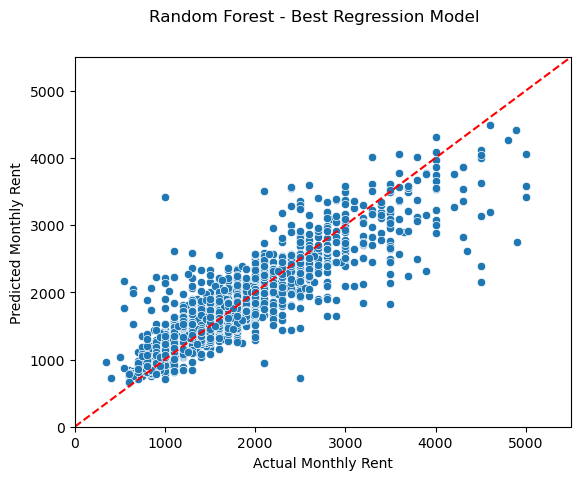

In [ ]:
# libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


#setting up
rf_tree = RandomForestRegressor(n_estimators = 500,
                                criterion = "squared_error",
                                max_features = "sqrt",
                                random_state = 123)

#fit model train
rf_tree.fit(X_train_clean, y_train)

# Predict model
y_pred_test = rf_tree.predict(X_test_clean)

# Calculate mean absolute error
mae_rf_cv_test = mean_absolute_error(y_test, y_pred_test)

# # Calculate R-squared
r2_rf_cv_test = r2_score(y_test, y_pred_test)

print(f"R2-score: {r2_rf_cv_test:.3f} and MAE score: +/-{mae_rf_cv_test:.2f} RM")

sns.scatterplot(x=y_test.flatten(), y=y_pred_test.flatten())
plt.plot([0, 5500], [0,5500], "--r")
plt.xlim(0, 5500)
plt.xlabel("Actual Monthly Rent")
plt.ylim(0,5500)
plt.ylabel("Predicted Monthly Rent")
plt.suptitle("Random Forest - Best Regression Model")
plt.show()

In [ ]:
mae_score = [mae_rf_cv_train, mae_rf_cv_test]
r2_score = [r2_rf_cv_train, r2_rf_cv_test]
indexes = ["train", "test"]

summary_df_train_test = pd.DataFrame({
    "MAE Train": mae_score,
    "R2-Score": r2_score,
},index = indexes)

summary_df_train_test

,MAE Train,R2-Score
train,99.601877,0.959628
test,225.483815,0.783881


In [ ]:
# calculate the feature importances
importances = rf_tree.feature_importances_

# rescale the importances back to the original scale of the features
importances = importances * X_train_clean.std()

# sort the feature importances in descending order
sorted_index = importances.argsort()[::-1]

# print the feature importances
dict_feature_importance = {}
for i in sorted_index:
    # print("{}: {}".format(X_train_clean.columns[i], importances[i]))
    dict_feature_importance.update({X_train_clean.columns[i]: importances[i]})
    
# Create a DataFrame from the dictionary
df = pd.DataFrame.from_dict(dict_feature_importance, orient='index', columns=['values'])

# Reset the index to become a column
df = df.reset_index()

# Rename the columns
df.columns = ['feature', 'importance_value']

df.sort_values(by='importance_value', ascending=False).head(10)

,feature,importance_value
0,size_sqft,0.222484
1,furnished_Fully Furnished,0.116090
2,completion_year,0.073512
3,bathroom,0.060770
4,rooms,0.046789
5,location_Mont Kiara,0.045317
6,parking,0.043784
7,property_type_Apartment,0.037627
8,location_KLCC,0.037180
9,furnished_Not Furnished,0.036066
